##Enunciado del Ejercicio
Título: Análisis de datos meteorológicos de AEMET - Barcelona Aeropuerto

Contexto:

Tienes un dataset de la AEMET con observaciones meteorológicas diarias del aeropuerto
de Barcelona. Este dataset incluye información como la temperatura media, mínima y
máxima, la precipitación, la velocidad del viento, las horas de sol, la presión atmosférica, y
la humedad.

Objetivo:

Realiza un análisis básico y responde a las siguientes preguntas:
1. ¿Cuál fue la temperatura media más alta y en qué fecha ocurrió?
2. ¿Cuál es el total de precipitación acumulada en enero de 2024?
3. ¿Cuál fue la velocidad media de viento más alta y en qué fecha?
4. Calcula el promedio de horas de sol por mes.
5. Crea un gráfico de la evolución diaria de la temperatura media.
6. ¿Cuál fue el día con la humedad mínima más baja y cuál fue su valor?

In [124]:
import pandas as pd

df1 = pd.read_json('/content/drive/MyDrive/datasets/2024_AEMET_BCNAeropuerto_1.json')
df2 = pd.read_json('/content/drive/MyDrive/datasets/2024_AEMET_BCNAeropuerto_2.json')
df = pd.merge(df1, df2, how='outer')
df['tmed'] = df['tmed'].str.replace(',', '.').astype(float)
df.iloc[df['tmed'].idxmax()][['fecha','tmed']]

,212
fecha,2024-07-31
tmed,29.2


In [125]:
df['prec'] = pd.to_numeric(df['prec'].str.replace(',', '.'), errors='coerce')
df['fecha'] = pd.to_datetime(df['fecha'])
df.loc[df['fecha'].dt.month == 1]['prec'].sum()

24.4

In [126]:
df['velmedia'] = df['velmedia'].str.replace(',', '.').astype(float)
df.iloc[df['velmedia'].idxmax()][['fecha','prec']]

,303
fecha,2024-10-30 00:00:00
prec,1.6


In [127]:
df['sol'] = df['sol'].str.replace(',', '.').astype(float)
df.groupby(df['fecha'].dt.month)['sol'].mean()

,sol
fecha,
1,3.564516
2,5.403448
3,6.658065
4,7.572414
5,9.070968
6,7.983333
7,10.332258
8,9.390323
9,6.743333


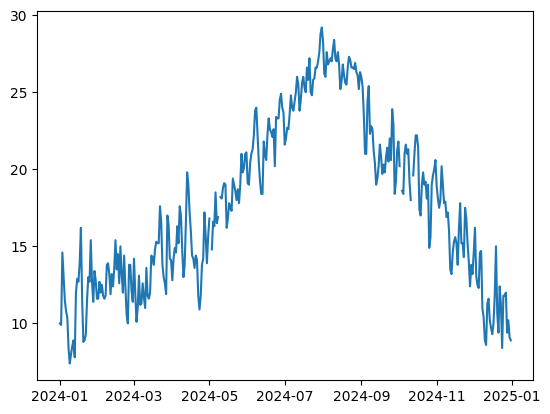

In [128]:
import matplotlib.pyplot as plt

plt.plot(df['fecha'], df['tmed'])
plt.show()

In [133]:
df['hrMin'] = df['hrMin'].str.replace(',', '.').astype(float)
df.iloc[df['hrMin'].idxmin()][['fecha','hrMin']]

,6
fecha,2024-01-07 00:00:00
hrMin,17.0
